In [ ]:
# 
# Within-Session-Analysis.ipynb
# 
# Author(s):
# Lan Mei <lanmei@student.ethz.ch>
#
# ======================================================================
# 
# Copyright (c) 2024 ETH Zurich.
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
# 
# http://www.apache.org/licenses/LICENSE-2.0
# 
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# SPDX-License-Identifier: Apache-2.0

In [1]:
from tensorboard.backend.event_processing import event_accumulator
import pandas as pd
import os
import numpy as np

## Accuracy

In [2]:
NUM_CV = 5
EXP_NO = 5 # No. of the experiment to be analyzed in QuantLab. example - Session 2 of Subject A, Dataset B
LIST_PATH_EVENTS = [f'quantlab-cl/systems/BCI_Drone_4classes/MIBMINet/logs/exp000{EXP_NO}/fold{i}/stats/epoch/' for i in range(NUM_CV)]

full_train_loss = []
full_valid_loss = []
full_train_acc = []
full_valid_acc = []

for CUR_PATH_EVENT in LIST_PATH_EVENTS:
    ea = event_accumulator.EventAccumulator(CUR_PATH_EVENT+os.listdir(CUR_PATH_EVENT)[0],
    size_guidance={
        event_accumulator.COMPRESSED_HISTOGRAMS: 0,
        event_accumulator.IMAGES: 0,
        event_accumulator.AUDIO: 0,
        event_accumulator.SCALARS: 500,
        event_accumulator.HISTOGRAMS: 0,
        })

    ea.Reload()
    cur_train_loss = pd.DataFrame(ea.Scalars('Loss/Train'))['value'].to_numpy()
    cur_valid_loss = pd.DataFrame(ea.Scalars('Loss/Valid'))['value'].to_numpy()
    cur_train_acc = pd.DataFrame(ea.Scalars('Accuracy/Train'))['value'].to_numpy()
    cur_valid_acc = pd.DataFrame(ea.Scalars('Accuracy/Valid'))['value'].to_numpy()

    full_train_loss.append(cur_train_loss)
    full_valid_loss.append(cur_valid_loss)
    full_train_acc.append(cur_train_acc)
    full_valid_acc.append(cur_valid_acc)

valid_loss_avg = np.mean(np.array(full_valid_loss), axis=0)
valid_loss_std = np.std(np.array(full_valid_loss), axis=0)
valid_acc_avg = np.mean(np.array(full_valid_acc), axis=0)
valid_acc_std = np.std(np.array(full_valid_acc), axis=0)


In [3]:
# Maximum validation accuracy
print(np.max(valid_acc_avg))

97.0


In [4]:
# Corresponding std.
print(valid_acc_std[np.argmax(valid_acc_avg)])

2.449489742783178


In [5]:
# Store the optimal epoch
temp_ind = np.argmax(valid_acc_avg)

## Precision

In [6]:
NUM_CV = 5
LIST_PATH_EVENTS = [f'quantlab-cl/systems/BCI_Drone_4classes/MIBMINet/logs/exp000{EXP_NO}/fold{i}/stats/epoch/' for i in range(NUM_CV)]

full_train_loss = []
full_valid_loss = []
full_train_acc = []
full_valid_acc = []

for CUR_PATH_EVENT in LIST_PATH_EVENTS:
    ea = event_accumulator.EventAccumulator(CUR_PATH_EVENT+os.listdir(CUR_PATH_EVENT)[0],
    size_guidance={
        event_accumulator.COMPRESSED_HISTOGRAMS: 0,
        event_accumulator.IMAGES: 0,
        event_accumulator.AUDIO: 0,
        event_accumulator.SCALARS: 500,
        event_accumulator.HISTOGRAMS: 0,
        })

    ea.Reload()
    cur_train_loss = pd.DataFrame(ea.Scalars('Loss/Train'))['value'].to_numpy()
    cur_valid_loss = pd.DataFrame(ea.Scalars('Loss/Valid'))['value'].to_numpy()
    cur_train_acc = pd.DataFrame(ea.Scalars('Accuracy_Precision/Train'))['value'].to_numpy()
    cur_valid_acc = pd.DataFrame(ea.Scalars('Accuracy_Precision/Valid'))['value'].to_numpy()

    full_train_loss.append(cur_train_loss)
    full_valid_loss.append(cur_valid_loss)
    full_train_acc.append(cur_train_acc)
    full_valid_acc.append(cur_valid_acc)

valid_loss_avg = np.mean(np.array(full_valid_loss), axis=0)
valid_loss_std = np.std(np.array(full_valid_loss), axis=0)
valid_acc_avg = np.mean(np.array(full_valid_acc), axis=0)
valid_acc_std = np.std(np.array(full_valid_acc), axis=0)

print(np.max(valid_acc_avg))

0.9777777791023254


In [7]:
# Precision
valid_acc_avg[temp_ind]

0.9527777791023254

In [8]:
# Std.
print(valid_acc_std[temp_ind])

0.058001701368291324


## Recall

In [9]:
NUM_CV = 5
LIST_PATH_EVENTS = [f'quantlab-cl/systems/BCI_Drone_4classes/MIBMINet/logs/exp000{EXP_NO}/fold{i}/stats/epoch/' for i in range(NUM_CV)]

full_train_loss = []
full_valid_loss = []
full_train_acc = []
full_valid_acc = []

for CUR_PATH_EVENT in LIST_PATH_EVENTS:
    ea = event_accumulator.EventAccumulator(CUR_PATH_EVENT+os.listdir(CUR_PATH_EVENT)[0],
    size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 0,
        event_accumulator.IMAGES: 0,
        event_accumulator.AUDIO: 0,
        event_accumulator.SCALARS: 500,
        event_accumulator.HISTOGRAMS: 0,
        })

    ea.Reload()
    cur_train_loss = pd.DataFrame(ea.Scalars('Loss/Train'))['value'].to_numpy()
    cur_valid_loss = pd.DataFrame(ea.Scalars('Loss/Valid'))['value'].to_numpy()
    cur_train_acc = pd.DataFrame(ea.Scalars('Accuracy_Recall/Train'))['value'].to_numpy()
    cur_valid_acc = pd.DataFrame(ea.Scalars('Accuracy_Recall/Valid'))['value'].to_numpy()

    full_train_loss.append(cur_train_loss)
    full_valid_loss.append(cur_valid_loss)
    full_train_acc.append(cur_train_acc)
    full_valid_acc.append(cur_valid_acc)

valid_loss_avg = np.mean(np.array(full_valid_loss), axis=0)
valid_loss_std = np.std(np.array(full_valid_loss), axis=0)
valid_acc_avg = np.mean(np.array(full_valid_acc), axis=0)
valid_acc_std = np.std(np.array(full_valid_acc), axis=0)

print(np.max(valid_acc_avg))

1.0


In [10]:
# Recall
valid_acc_avg[temp_ind]

0.9866666674613953

In [11]:
# Std.
print(valid_acc_std[temp_ind])

0.026666665077209474


## Specificity

In [12]:
NUM_CV = 5
LIST_PATH_EVENTS = [f'quantlab-cl/systems/BCI_Drone_4classes/MIBMINet/logs/exp000{EXP_NO}/fold{i}/stats/epoch/' for i in range(NUM_CV)]

full_train_loss = []
full_valid_loss = []
full_train_acc = []
full_valid_acc = []

for CUR_PATH_EVENT in LIST_PATH_EVENTS:
    ea = event_accumulator.EventAccumulator(CUR_PATH_EVENT+os.listdir(CUR_PATH_EVENT)[0],
    size_guidance={ # see below regarding this argument
        event_accumulator.COMPRESSED_HISTOGRAMS: 0,
        event_accumulator.IMAGES: 0,
        event_accumulator.AUDIO: 0,
        event_accumulator.SCALARS: 500,
        event_accumulator.HISTOGRAMS: 0,
        })

    ea.Reload()
    cur_train_loss = pd.DataFrame(ea.Scalars('Loss/Train'))['value'].to_numpy()
    cur_valid_loss = pd.DataFrame(ea.Scalars('Loss/Valid'))['value'].to_numpy()
    cur_train_acc = pd.DataFrame(ea.Scalars('Accuracy_Spec/Train'))['value'].to_numpy()
    cur_valid_acc = pd.DataFrame(ea.Scalars('Accuracy_Spec/Valid'))['value'].to_numpy()

    full_train_loss.append(cur_train_loss)
    full_valid_loss.append(cur_valid_loss)
    full_train_acc.append(cur_train_acc)
    full_valid_acc.append(cur_valid_acc)

valid_loss_avg = np.mean(np.array(full_valid_loss), axis=0)
valid_loss_std = np.std(np.array(full_valid_loss), axis=0)
valid_acc_avg = np.mean(np.array(full_valid_acc), axis=0)
valid_acc_std = np.std(np.array(full_valid_acc), axis=0)

print(np.max(valid_acc_avg))

0.9846153855323792


In [13]:
# Specificity
valid_acc_avg[temp_ind]

0.9679487228393555

In [14]:
# Std.
print(valid_acc_std[temp_ind])

0.03930694176062705


## Plot Validation Accuracy Curve

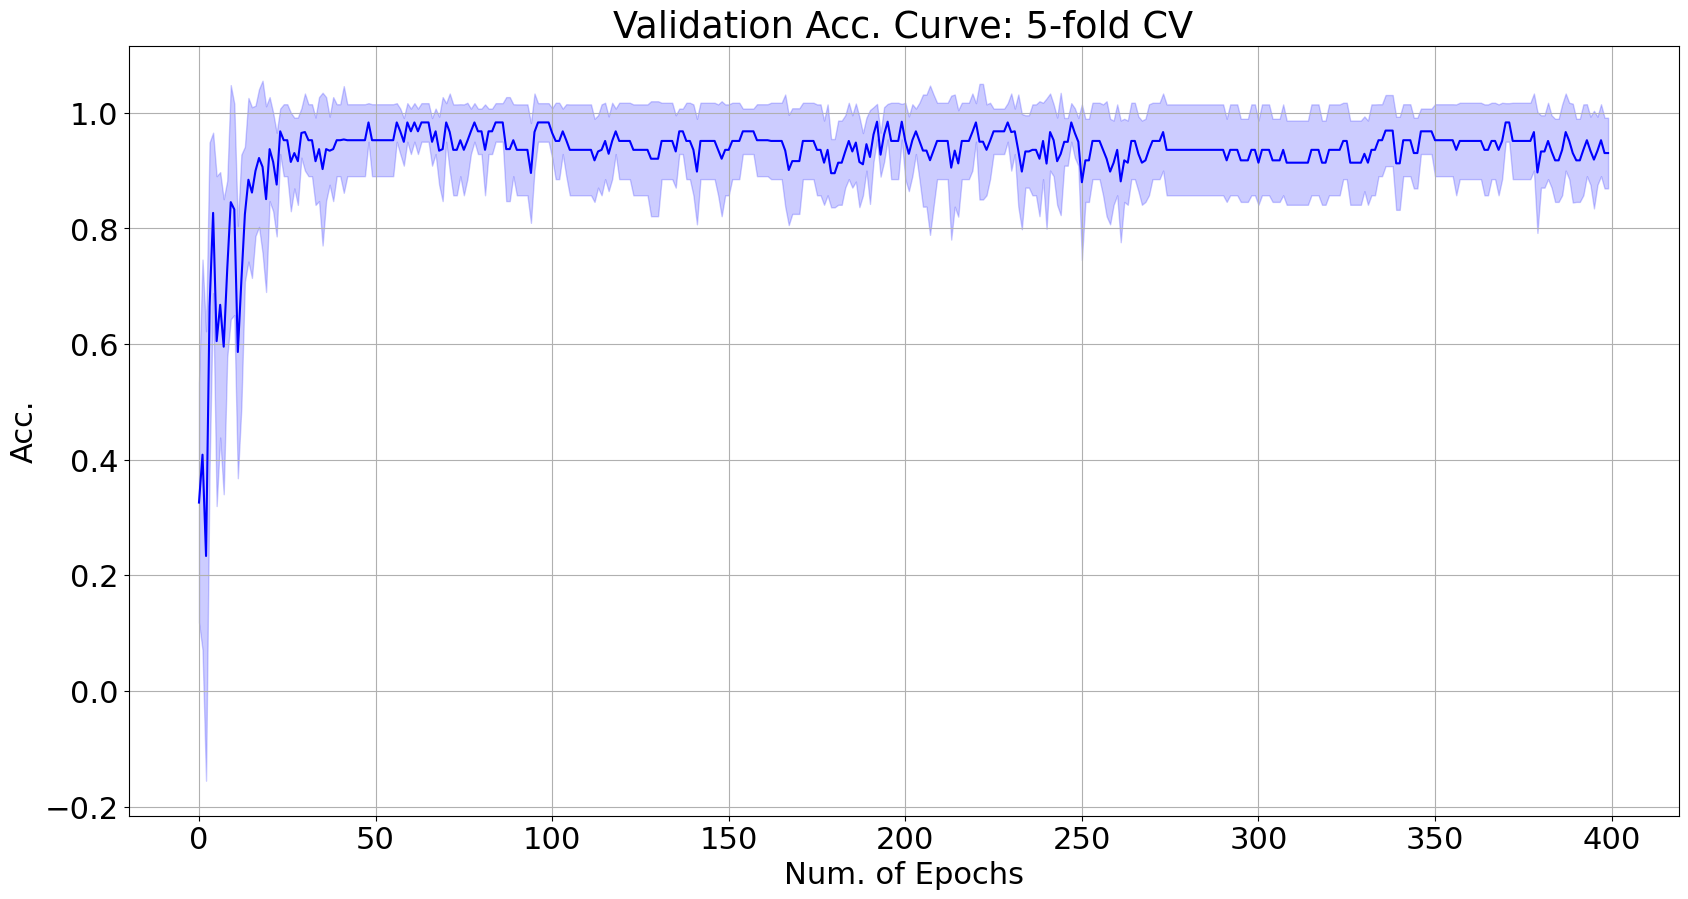

In [15]:
# Plot validation accuracy curve over epochs
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size' : 22})

epochs = np.arange(len(valid_acc_avg))
plt.plot(epochs, valid_acc_avg, 'b-', label='valid_acc_avg')
plt.fill_between(epochs, valid_acc_avg - valid_acc_std, valid_acc_avg + valid_acc_std, color='b', alpha=0.2)
plt.xlabel("Num. of Epochs")
plt.ylabel("Acc.")
plt.title("Validation Acc. Curve: 5-fold CV")
plt.grid()
plt.show()